# Retrieval-Augmented Shopping Assistant - EDA

This notebook explores the ABO dataset for initial insights.

In [14]:
import pandas as pd

In [ ]:
# Load ABO image dataset
df_img = pd.read_csv("/kaggle/input/amazon-berkeley-objects/images/metadata/images.csv")  # or csv if applicable

In [ ]:
# 1. Check structure
print(df_img.shape)
print(df_img.columns)
print(df_img.dtypes)

# 2. Check missing values
print(df_img.notnull().sum())

# 3. Sample record
df_img.sample(5)

# 4. (If possible) display an image
from PIL import Image
import matplotlib.pyplot as plt

img_loc = str(df_img.loc[df_img['path']== '8c/8ccb5859.jpg']['path']).split()[1]
img_path = '/kaggle/input/amazon-berkeley-objects/images/small/' + img_loc  # based on image_id field
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Load ABO metadata dataset

import os, glob
full_metadata = pd.DataFrame()
for json_file in glob.glob("/kaggle/input/listing/listings/metadata/*.json"):
    print('Loading file: ' + json_file + '\n')
    df_metadata = pd.read_json(json_file, lines = True)
    full_metadata = pd.concat([full_metadata, df_metadata])

In [ ]:
# 1. Check structure
print(full_metadata.shape)
print(full_metadata.columns)
print(full_metadata.dtypes)

In [5]:
# 2. Check missing values
print(full_metadata.notnull().sum())

brand                  147643
bullet_point           131570
color                  116180
item_id                147702
item_name              147702
item_weight            106194
material                53585
model_name              81579
model_number           124091
product_type           147702
main_image_id          147127
other_image_id         137976
item_keywords          126776
country                147702
marketplace            147702
domain_name            147702
node                   140749
style                   43188
item_dimensions         43338
model_year               7765
color_code              18243
spin_id                  8222
3dmodel_id               7960
fabric_type              8193
item_shape               5066
pattern                  4590
product_description      4240
finish_type              1536
dtype: int64


From above, "finish_type" column has the lowest number of values present i.e. 1536 out of 147702 product entries.

In [18]:
#Find duplicate item_id rows

duplicate_counts = full_metadata['item_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(duplicate_counts)

item_id
B01BC2TBZ4    5
B00MEAYVH2    5
B00Q4TK5KG    5
B00Q6EY5UU    5
B07F87HC4V    4
             ..
B07R8FR8S4    2
B07Z58WTMK    2
B082MV768H    2
B06X9GMSD5    2
B07RPND47Z    2
Name: count, Length: 1932, dtype: int64


In [19]:
full_metadata.loc[full_metadata['item_id'] == 'B01BC2TBZ4']

,brand,bullet_point,color,item_id,item_name,item_weight,material,model_name,model_number,product_type,main_image_id,other_image_id,item_keywords,country,marketplace,domain_name,node,style,item_dimensions,model_year,color_code,spin_id,3dmodel_id,fabric_type,item_shape,pattern,product_description,finish_type
3100,"[{'language_tag': 'es_ES', 'value': 'AmazonBasics'}, {'language_tag': 'pt_PT', 'value': 'AmazonBasics'}]","[{'language_tag': 'es_ES', 'value': 'Juego de X o X fundas para proteger tu almohada.'}, {'language_tag': 'es_ES', 'value': 'Fabricadas de algodón 100% (85 g/m²) para una capa de confort extra.'}, {'language_tag': 'es_ES', 'value': 'Cremallera oculta para mantener la almohada en su sitio durante toda la noche.'}, {'language_tag': 'es_ES', 'value': 'Lavable en lavadora con colores similares (hasta 40 °C).'}, {'language_tag': 'es_ES', 'value': 'Cada una mide X x X cm.'}, {'language_tag': 'pt_PT', 'value': 'X ou X capas para proteger o seu travesseiro.'}, {'language_tag': 'pt_PT', 'value': 'Feito de algodão 100% (85g/m²) para uma camada extra de conforto.'}, {'language_tag': 'pt_PT', 'value': 'Zíper oculto para manter a almofada no lugar toda a noite.'}, {'language_tag': 'pt_PT', 'value': 'Lavável na máquina com cores semelhantes (até 40 °C).'}, {'language_tag': 'pt_PT', 'value': 'Cada uma mede x x x cm.'}]",NaN,B01BC2TBZ4,"[{'language_tag': 'es_ES', 'value': 'AmazonBasics 100% Cotton Soft Pillow Case with Zip'}, {'language_tag': 'pt_PT', 'value': 'AmazonBasics 100% Cotton Soft Pillow Case with Zip'}]",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],71hiSKP7S6L,[71vbYUabUlL],"[{'language_tag': 'es_ES', 'value': 'EFN_UKES_mllutter'}, {'language_tag': 'pt_PT', 'value': 'EFN_UKES_mllutter'}]",ES,Amazon,amazon.es,"[{'node_id': 3250027031, 'node_name': '/Categorías/Textiles del hogar/Ropa de cama y almohadas/Sábanas y fundas de almohada/Fundas para almohada'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5348,"[{'language_tag': 'it_IT', 'value': 'AmazonBasics'}]","[{'language_tag': 'it_IT', 'value': 'Set di X o X federe copricuscino.'}, {'language_tag': 'it_IT', 'value': 'Realizzate in 100% cotone (85 g/mq) per aggiungere uno strato extra di morbido comfort.'}, {'language_tag': 'it_IT', 'value': 'Cerniera nascosta per tenere il cuscino in posizione durante la notte.'}, {'language_tag': 'it_IT', 'value': 'Lavabili in lavatrice con colori simili (fino a 40°C).'}, {'language_tag': 'it_IT', 'value': 'Dimensioni: X x X cm ciascuna.'}]",NaN,B01BC2TBZ4,"[{'language_tag': 'it_IT', 'value': 'AmazonBasics 100% Cotton Soft Pillow Case with Zip'}]",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],413jqtAkNSL,"[61zQgNq1DtL, 616p93l+d5L, 61ZKCJ0ilkL, 61i6maIErCL, 71vbYUabUlL, 71wsn+knMWL]","[{'language_tag': 'it_IT', 'value': 'efn_ukit_mllutter'}]",IT,Amazon,amazon.it,"[{'node_id': 731786031, 'node_name': '/Categorie/Tessili per la casa/Biancheria da letto/Lenzuola e federe/Federe'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,"[{'language_tag': 'fr_FR', 'value': 'AmazonBasics'}]","[{'language_tag': 'fr_FR', 'value': 'Lot de X taies d'oreiller'}, {'language_tag': 'fr_FR', 'value': 'Fabriquées entièrement en coton (85 g/m²) pour une douceur et un confort optimaux'}, {'language_tag': 'fr_FR', 'value': 'Fermeture Éclair intégrée permettant de maintenir l'oreiller en place pendant la nuit'}, {'language_tag': 'fr_FR', 'value': 'Lavable en machine avec des couleurs similaires (40 °C maximum)'}, {'language_tag': 'fr_FR', 'value': 'Dimensions : X x X cm chacune'}]",NaN,B01BC2TBZ4,"[{'language_tag': 'fr_FR', 'value': 'AmazonBasics Taies d'oreiller 100 % coton doux avec fermeture'}]",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],61i6maIErCL,[71vbYUabUlL],"[{'language_tag': 'fr_FR', 'value': 'EFN_UKFR_mllutter'}]",FR,Amazon,amazon.fr,"[{'node_id': 3213184031, 'node_name': '/Catégories/Ameublement et décoration/Literie et linge de maison/Linge de lit et oreillers/Draps et taies d'oreillers/Taies d'oreillers'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN

There are duplicate item_ids, because of multiple language support. We will remove duplicates after creating 
a scoped dataframe for supported language.

In [27]:
# 3. Sample record
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
#full_metadata.sample(5)

From above, it is clear that:
1. Only **item_name** column is present for all products.
2. We will use **item_name** to filter for in scope language - English.

In [20]:
# 4. Display an image using image id from the metadata

from PIL import Image
import matplotlib.pyplot as plt
print(full_metadata.loc[full_metadata['main_image_id'] == '413jqtAkNSL'])

                                                     brand  \
5348  [{'language_tag': 'it_IT', 'value': 'AmazonBasics'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    bullet_point  \
5348  [{'language_tag': 'it_IT', 'value': 'Set di X o X federe copricuscino.'}, {'language_tag': 'it_IT', 'value': 'Realizzate in 100% cotone (85 g/mq) per aggiungere uno strato extra di morbido comfort.'}, {'language_tag': 'it_IT', 'value': 'Cerniera nascosta per tenere il cuscino in posizione durante la notte.'}, {'language_tag': 'it_IT', 'value': 'Lavabili in lavatrice con colori simil

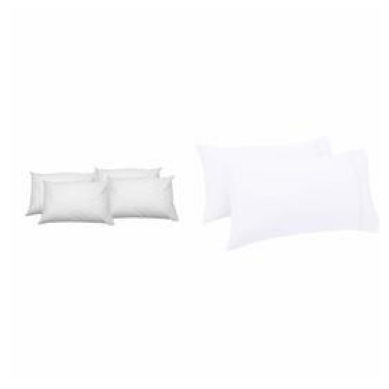

In [21]:
img_row = full_metadata.loc[full_metadata['main_image_id'] == '413jqtAkNSL']
img_id = img_row.iloc[0]['main_image_id']
img_location = str(df_img.loc[df_img['image_id'] == img_id]['path'])
img = Image.open('/kaggle/input/amazon-berkeley-objects/images/small/' + img_location.split()[1])
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
# Analyse the number of languages supported. US-English in scope only.
count_US_lang_key = 0
count_prodDesc = 0
count_total=0
lang_set = set()
for val in full_metadata['item_name']:
    count_total += 1
    for key, value in val[0].items():
        if(key == 'language_tag'):
            lang_set.add(value)
print(lang_set)

{'ko_KR', 'es_MX', 'zh_TW', 'sv_SE', 'en_AU', 'fr_CA', 'en_CA', 'he_IL', 'es_US', 'kn_IN', 'tr_TR', 'hi_IN', 'zh_CN', 'en_GB', 'nl_NL', 'pt_BR', 'fr_FR', 'te_IN', 'ja_JP', 'en_IN', 'es_ES', 'en_US', 'ar_AE', 'en_SG', 'ml_IN', 'en_AE', 'cs_CZ', 'it_IT', 'pl_PL', 'de_DE'}


Amongst these, only English language will be used. i.e,
en_SG,
en_CA,
en_AU,
en_GB, 
en_AE, 
en_US,
en_IN

In [29]:
# Analyse the number of languages supported. US-English in scope only.
countTotalProdDesc = 0
countTotalEngDesc = 0
for val in full_metadata['item_name']:
    for key, value in val[0].items():
        if(key == 'language_tag'and value in ('en_SG', 'en_CA','en_AU','en_GB','en_AE','en_US','en_IN')):
            #list_items = list(val[0].items())
            #print(list_items[1])
            countTotalEngDesc += 1
        countTotalProdDesc += 1 

print('countTotalEngDesc: ', countTotalEngDesc)
print('countTotalProdDesc: ', countTotalProdDesc)
print('Percentage of data under scope:', countTotalEngDesc/countTotalProdDesc * 100)

countTotalEngDesc:  106474
countTotalProdDesc:  295528
Percentage of data under scope: 36.02839663246799


In [11]:
# Reduce the metadata to in scope languages only

# Step 1: Store indices of rows that match the language criteria
matching_indices = []

valid_languages = {'en_SG', 'en_CA','en_AU','en_GB','en_AE','en_US','en_IN'}

for idx, row in full_metadata.iterrows():
    item_name = row['item_name']
    if isinstance(item_name, list):
        if any(d.get('language_tag') in valid_languages for d in item_name if isinstance(d, dict)):
            matching_indices.append(idx)

# Step 2: Filter all at once using .iloc
inScopeMetadata = full_metadata.iloc[matching_indices].reset_index(drop=True)

In [12]:
#Find duplicate item_id rows

duplicate_counts = inScopeMetadata['item_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(duplicate_counts)

item_id
B0746MMVXW    28
B07WC622LH    28
B07797D9MW    27
B073S3R169    26
B01928HSB4    26
              ..
B07GN662BP     7
B07RRWD8QB     7
B07RR3RFHT     7
B01719EX2S     7
B07HFTZ8YW     7
Name: count, Length: 9225, dtype: int64


In [13]:
inScopeMetadata.loc[inScopeMetadata['item_id'] == 'B07GN662BP']

,brand,bullet_point,color,item_id,item_name,item_weight,material,model_name,model_number,product_type,...,item_dimensions,model_year,color_code,spin_id,3dmodel_id,fabric_type,item_shape,pattern,product_description,finish_type
30949,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38683,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61738,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69417,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92449,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107772,"[{'language_tag': 'it_IT', 'value': 'UMI'}]","[{'language_tag': 'it_IT', 'value': 'Scegli il...","[{'language_tag': 'it_IT', 'value': 'Nero'}]",B07GN662BP,"[{'language_tag': 'it_IT', 'value': 'UMI. Esse...",NaN,NaN,NaN,[{'value': '.'}],[{'value': 'SPORTING_GOODS'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
def auto_flatten_json_columns(df, keys_to_try=['value', 'name', 'node_name']):
    """
    Detects and flattens columns containing lists of JSON objects,
    extracting specified keys.
    Adds new columns with a `_flat` suffix.
    """
    def extract_from_list(ld, keys):
        if isinstance(ld, list):
            for key in keys:
                values = [str(d.get(key)) for d in ld if isinstance(d, dict) and key in d]
                if values:  # found at least one valid value
                    return ", ".join(values)
        return None

    # Track flattened columns
    flattened = []

    for col in df.columns:
        sample = df[col].iloc[0]
        if isinstance(sample, list) and all(isinstance(i, dict) for i in sample):
            flat_col = f"{col}_flat"
            df[flat_col] = df[col].apply(lambda x: extract_from_list(x, keys_to_try))
            flattened.append(flat_col)

    return df, flattened

In [38]:
print(inScopeMetadata.shape)

NameError: name 'inScopeMetadata' is not defined

In [33]:
inScopeMetadata, flattened_cols = auto_flatten_json_columns(inScopeMetadata)
print("Flattened columns:", flattened_cols)


Flattened columns: ['brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat', 'item_weight_flat', 'material_flat', 'model_name_flat', 'model_number_flat', 'product_type_flat', 'item_keywords_flat', 'node_flat']


In [ ]:
print(inScopeMetadata.columns)

In [52]:
print(full_metadata.shape)

(147702, 39)


In [53]:
full_metadata, flattened_cols = auto_flatten_json_columns(full_metadata)
print("Flattened columns:", flattened_cols)

Flattened columns: ['brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat', 'item_weight_flat', 'material_flat', 'model_name_flat', 'model_number_flat', 'product_type_flat', 'item_keywords_flat', 'node_flat']


In [54]:
print(full_metadata.shape)

(147702, 39)


In [55]:
print(full_metadata.dtypes)

brand                  object
bullet_point           object
color                  object
item_id                object
item_name              object
item_weight            object
material               object
model_name             object
model_number           object
product_type           object
main_image_id          object
other_image_id         object
item_keywords          object
country                object
marketplace            object
domain_name            object
node                   object
style                  object
item_dimensions        object
model_year             object
color_code             object
spin_id                object
3dmodel_id             object
fabric_type            object
item_shape             object
pattern                object
product_description    object
finish_type            object
brand_flat             object
bullet_point_flat      object
color_flat             object
item_name_flat         object
item_weight_flat       object
material_f

In [43]:
# 2. Check missing values
print(full_metadata.notnull().sum())

brand                  147643
bullet_point           131570
color                  116180
item_id                147702
item_name              147702
item_weight            106194
material                53585
model_name              81579
model_number           124091
product_type           147702
main_image_id          147127
other_image_id         137976
item_keywords          126776
country                147702
marketplace            147702
domain_name            147702
node                   140749
style                   43188
item_dimensions         43338
model_year               7765
color_code              18243
spin_id                  8222
3dmodel_id               7960
fabric_type              8193
item_shape               5066
pattern                  4590
product_description      4240
finish_type              1536
brand_flat             147643
bullet_point_flat      131570
color_flat             116180
item_name_flat         147702
item_weight_flat       106194
material_f

In [63]:
print(full_metadata.index[:10])

RangeIndex(start=0, stop=10, step=1)


In [62]:
full_metadata = full_metadata.reset_index(drop=True)

In [64]:
print(full_metadata.loc[1])  # Row with index label 1

brand                                                             [{'language_tag': 'en_US', 'value': 'Ravenna Home'}]
bullet_point                                                                                                       NaN
color                                                               [{'language_tag': 'en_US', 'value': 'Light Grey'}]
item_id                                                                                                     B07KRBPKT6
item_name                                      [{'language_tag': 'en_US', 'value': 'Light Grey Swatch, Ravenna Home'}]
item_weight                   [{'normalized_value': {'unit': 'pounds', 'value': 0.1}, 'unit': 'pounds', 'value': 0.1}]
material                                                                                                           NaN
model_name                                                                                                         NaN
model_number                                    

In [73]:
print(full_metadata.columns)

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type',
       'brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat',
       'item_weight_flat', 'material_flat', 'model_name_flat',
       'model_number_flat', 'product_type_flat', 'item_keywords_flat',
       'node_flat'],
      dtype='object')


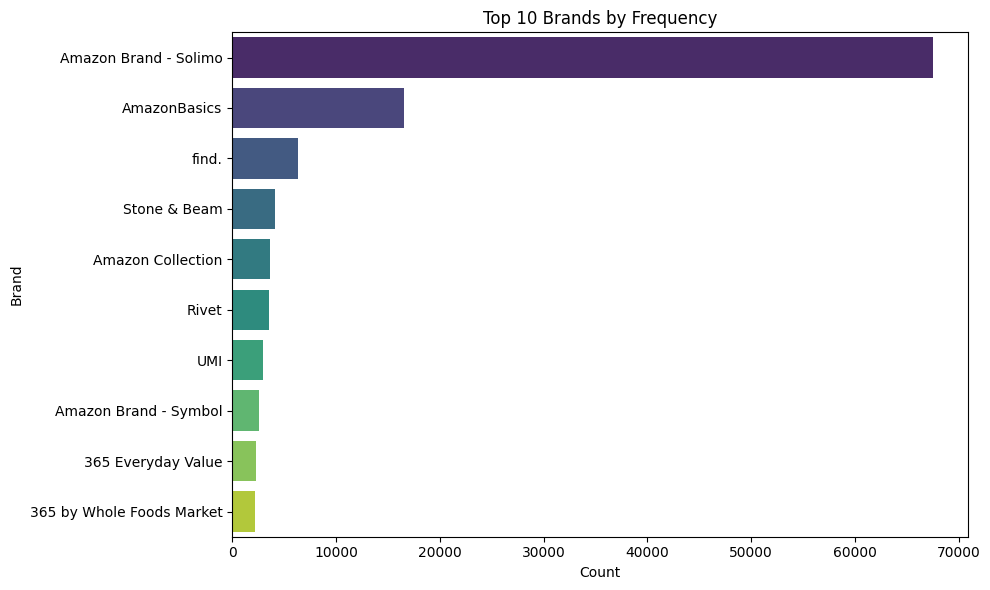

In [74]:
#1. Top 10 Brands

import matplotlib.pyplot as plt
import seaborn as sns

top_brands = full_metadata['brand_flat'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

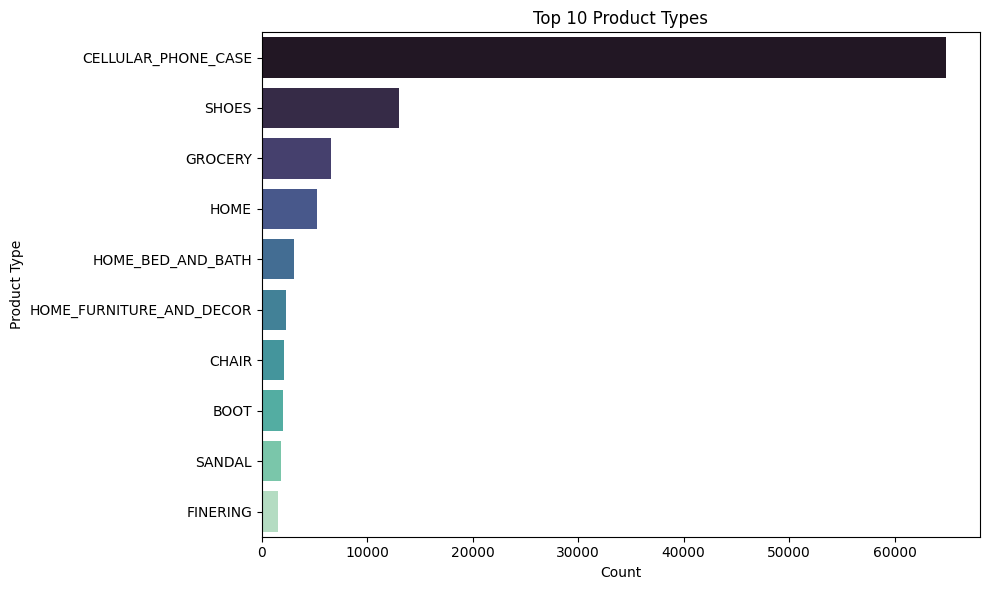

In [76]:
# Top 10 product types

top_types = full_metadata['product_type_flat'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='mako')
plt.title("Top 10 Product Types")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()

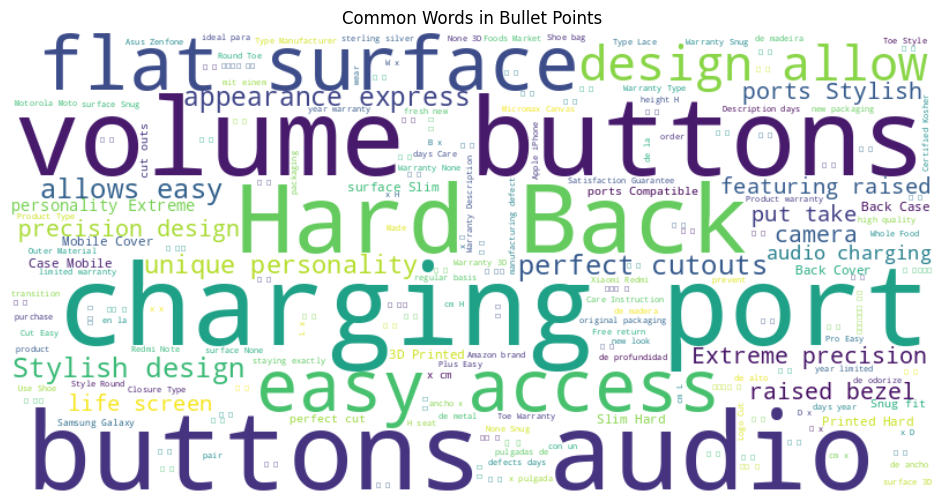

In [80]:
#Word cloud from bullet_point information

from wordcloud import WordCloud

text = " ".join(full_metadata['bullet_point_flat'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Bullet Points")
plt.show()

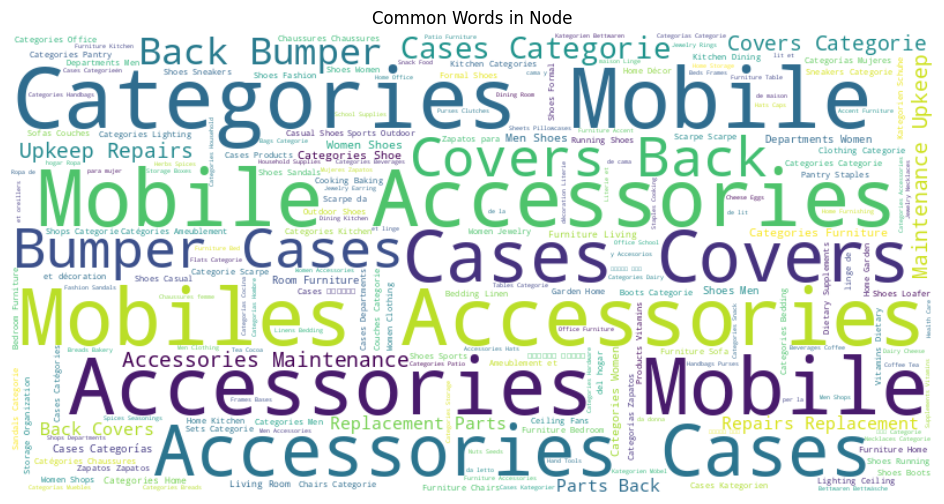

In [81]:
#Word cloud from node information

from wordcloud import WordCloud

text = " ".join(full_metadata['node_flat'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Node")
plt.show()

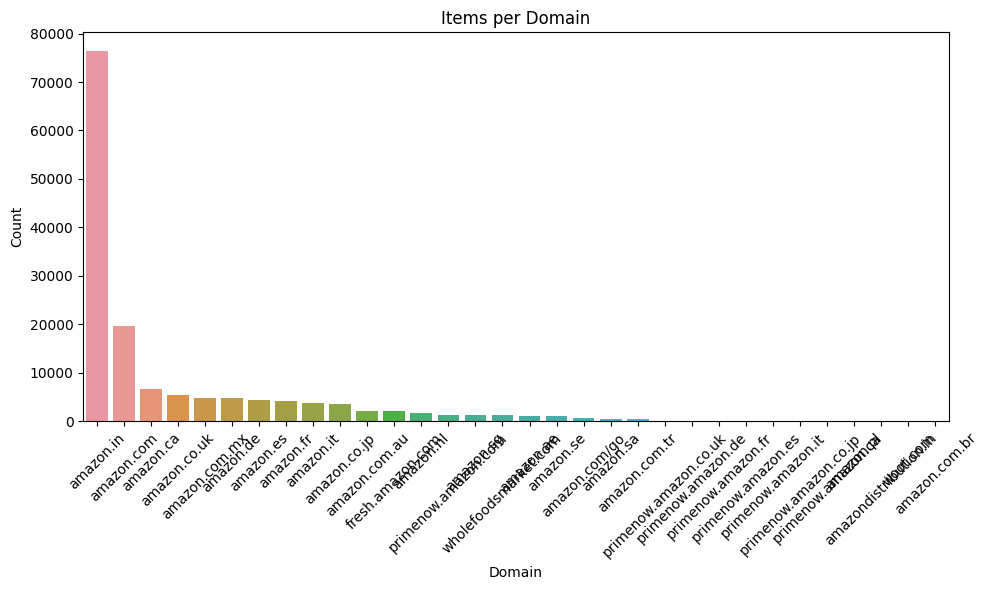

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=full_metadata, x='domain_name', order=full_metadata['domain_name'].value_counts().index)
plt.title("Items per Domain")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above plots show:
1. "Amazon" marketplace captures more than half of the items

In [47]:
#Serialize to parquet/persistent storage

inScopeMetadata.to_parquet("inScopeMetadata_with_embeddings.parquet", index=False)


With above copy, we have:

inScopeMetadata_with_embeddings.parquet → all metadata + embedding inputs